In [2]:
import csv
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

In [3]:
class Animal:
    def __init__(self, category='', scientific_name='', conservation_status=''):
        self._category = category
        self._scientific_name = scientific_name
        self._common_names = []
        self._conservation_status = conservation_status
        self._park_name = {'Great Smoky Mountains National Park':0, 'Yosemite National Park':0, 
                           'Bryce National Park':0, 'Yellowstone National Park':0}
    
    def get_scientific_name(self):
        return self._scientific_name

    def get_category(self):
        return self._category

    def get_conservation_status(self):
        return self._conservation_status
    
    def get_park_names(self):
        for x in self._park_name.keys():
            yield x

    def add_observations(self, park_name, population):
        if self._park_name[park_name] == 0:
            self._park_name[park_name] += int(population)     

    def add_common_names(self, names):
        if "\"" in names:
            names_list = ','.split(names)

            for name in names_list:
                if name != '' and name not in self._common_names:
                    self._common_names.append(name)

        else:
            if names not in self._common_names:
                self._common_names.append(names)



In [4]:
#TODO: Find a better way to parse csv files with pandas
list_of_animals = []
global animal_exists      # used to see if animal is already present in list_of_animals


# reading csv file to obtain attributes to create animal class
with open("observations.csv", 'r') as observations:
    with open("species_info.csv", 'r') as species_info:
        #reader objects
        dict_reader_species = csv.DictReader(species_info)
        dict_reader_obsvr = csv.DictReader(observations)

        #checks to see if animal already exists in the list and updates animal_exist
        for row1 in dict_reader_species:
            animal_exists = False

            for animal in list_of_animals:
                if animal.get_scientific_name() == row1['scientific_name']:
                    animal_exists = True
                    break
                
            observations.seek(0)

            if animal_exists == True:
                for row in dict_reader_obsvr:
                    for animal in list_of_animals:
                        if animal.get_scientific_name() == row1['scientific_name'] and row['scientific_name'] == row1['scientific_name']:
                            animal.add_common_names(row1['common_names']) # adds common names
                            animal.add_observations(row['park_name'], row['observations'])
                            break
                                
                    

            #if animal doesn't exist
            else:
                animal = Animal(category=row1['category'], scientific_name=row1['scientific_name'], conservation_status=row1['conservation_status'])
                animal.add_common_names(row1['common_names'])

                #generates new object with all the attributes from species_info.csv
                for row in dict_reader_obsvr:
                    if row1['scientific_name'] == row['scientific_name']:
                        animal.add_observations(row['park_name'],row['observations'])
                        list_of_animals.append(animal)
                        break



KeyboardInterrupt: 

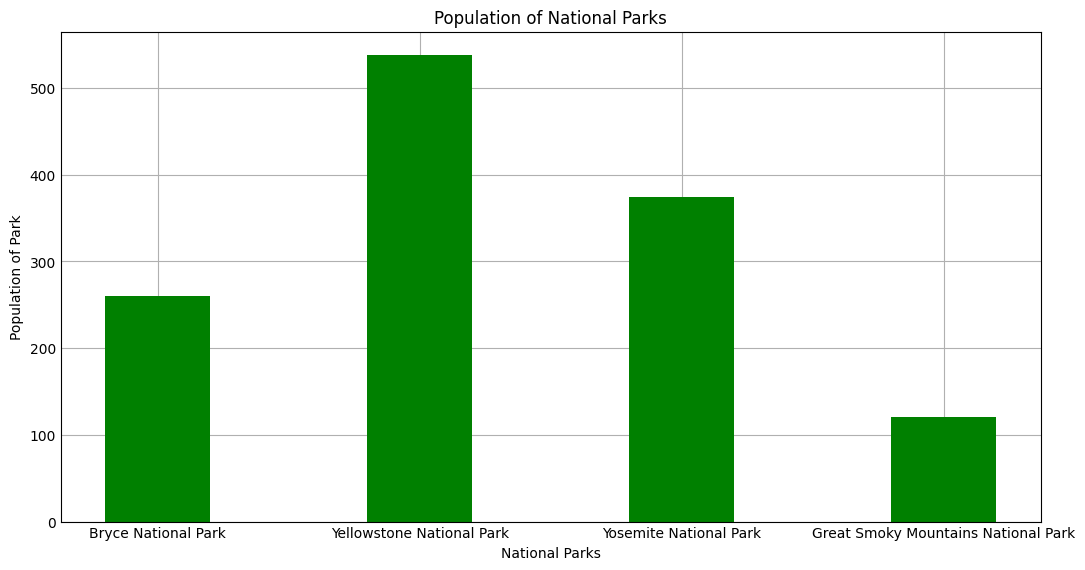

In [22]:
# 1) Conservation_Status by category
parks_and_pops = {}

#gets parks populations and adds them to the dictionary
for animal in list_of_animals:
    if animal.park_name not in parks_and_pops.keys() and animal.park_name != '' :
        parks_and_pops[animal.park_name] = int(animal.observations)
        

    if animal.park_name in parks_and_pops.keys() and animal.park_name != '':
        parks_and_pops[animal.park_name] += int(animal.observations)


#for creating bar graph
plt.style.use('_mpl-gallery')
x = parks_and_pops.keys()
y = parks_and_pops.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',width = 0.4)

plt.xlabel("National Parks")
plt.ylabel("Population of Park")
plt.title("Population of National Parks")
plt.show()

In [23]:
# 2) Coservation_Status by category per park
categories_of_animals = []
for animal in list_of_animals:
    if animal.category not in categories_of_animals and animal.category != '':
        categories_of_animals.append(animal.category)

for key in parks_and_pops.keys():
    parks_and_pops[key] = {'Mammal':0, 'Bird':0, 'Reptile':0, 'Amphibian':0, 'Fish':0, 'Vascular Plant':0, 'Nonvascular Plant':0}

for animal in list_of_animals:
    if animal.park_name in parks_and_pops.keys() and animal.park_name != '':
        parks_and_pops[animal.park_name][animal.category] += int(animal.observations)

for animal in list_of_animals:
    print(animal.park_name)
    print(animal.common_names) 
    print(animal.category)
    print(animal.scientific_name )


parks = parks_and_pops.keys()
cat1 = parks_and_pops.values()

# fig = plt.figure(figsize = (10, 5))

# # creating the bar plot
# plt.bar(x, y, color ='green',width = 0.4)

# plt.xlabel("National Parks")
# plt.ylabel("Population of Park")
# plt.title("Population of National Parks")
# plt.show()

Bryce National Park
Gapper's Red-Backed Vole
Mammal
Clethrionomys gapperi gapperi
Yellowstone National Park
American Bison, Bison
Mammal
Bos bison
Yosemite National Park
Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle
Mammal
Bos taurus
Yosemite National Park
Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
Mammal
Ovis aries
Great Smoky Mountains National Park
Wapiti Or Elk
Mammal
Cervus elaphus

White-Tailed Deer
Mammal
Odocoileus virginianus

Feral Hog, Wild Pig
Mammal
Sus scrofa

Coyote
Mammal
Canis latrans

Gray Wolf
Mammal
Canis lupus

Red Wolf
Mammal
Canis rufus

Common Gray Fox, Gray Fox
Mammal
Urocyon cinereoargenteus

Black Fox, Cross Fox, Red Fox, Silver Fox
Mammal
Vulpes fulva

Red Fox
Mammal
Vulpes vulpes

Mountain Lion
Mammal
Felis concolor

Wild Cat, Wildcat
Mammal
Felis silvestris

Bobcat
Mammal
Lynx rufus

Panther (Mountain Lion)
Mammal
Puma concolor

Striped Skunk
Mammal
Mephitis mephitis

Eastern Spotted Skunk
Mammal
Spilogale putorius

River Otter
Mamm

In [24]:
# 3) Per park, populations of each category